In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [166]:
# Loading the dataset from the resources folder

crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'))

# Exploratory Data Analysis (EDA):

1. Drop the unnamed column as it does not contribute to clustering or add value to input data
2. List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.
3. Is there any column whose data type need to be changed? If so, make the corresponding adjustments.
4. Is there any unnecessary column that needs to be dropped? If so, make the corresponding adjustments.
5. Check for duplicates.
6. In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales.
7. Rename the column if needed.

In [167]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [168]:
crypto_df.shape

(1252, 7)

In [169]:
crypto_df['IsTrading'].unique()

array([ True, False])

In [170]:
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [171]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [172]:
# Find null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")


Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [173]:
# Find duplicate entries
print(f"Duplicate entries: {crypto_df.duplicated().sum()}")


Duplicate entries: 0


In [174]:
# A list of the columns from the original DataFrame
crypto_df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

## Data Preparation:

In [175]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
crypto_df = crypto_df.loc[:, ~crypto_df.columns.str.contains('^Unnamed')]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [176]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies 
# that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.

# selecting rows based on condition 

trading_df = crypto_df[(crypto_df['IsTrading'] == True)]
trading_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [177]:
# Drop the null columns where all values are null
trading_df = trading_df.dropna(axis='columns', how='all')
trading_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [178]:
# Remove all rows that have at least one null value.
trading_df = trading_df.dropna(how = 'all')
trading_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [179]:
trading_df.shape

(1144, 6)

In [180]:
# Find null values
for column in trading_df.columns:
    print(f"Column {column} has {trading_df[column].isnull().sum()} null values")


Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [181]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
# Filter the dataframe with non zero values in column 'TotalCoinsMined'
trading_df = trading_df.loc[~(trading_df['TotalCoinsMined'] == 0)]
trading_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [182]:
# Drop 'IsTrading' column from the dataframe

trading_df = trading_df.drop(['IsTrading'], axis=1)
trading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [183]:
trading_df = trading_df.fillna(0)
trading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,0.000000e+00,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,0.000000e+00,611000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,0.000000e+00,1000000000
1244,UOS,SHA-256,DPoI,0.000000e+00,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [184]:
# In order for your dataset to be comprehensible to a machine learning algorithm, 
# its data should be numeric. Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the original dataframe.

# Drop 'CoinName' column from the dataframe

trading_df = trading_df.drop(['CoinName'], axis=1)
trading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,0.000000e+00,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,0.000000e+00,611000
5,X13,PoW/PoS,2.927942e+10,314159265359
...,...,...,...,...
1243,Ethash,PoW,0.000000e+00,1000000000
1244,SHA-256,DPoI,0.000000e+00,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [185]:
trading_df = trading_df.reset_index()

In [186]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data
X_dummies = pd.get_dummies(trading_df)
X = X_dummies
print (X.columns)
X

Index(['index', 'TotalCoinsMined', 'Algorithm_1GB AES Pattern Search',
       'Algorithm_536', 'Algorithm_Argon2', 'Algorithm_Argon2d',
       'Algorithm_BLAKE256', 'Algorithm_Blake', 'Algorithm_Blake2S',
       'Algorithm_Blake2b',
       ...
       'TotalCoinSupply_98000000', 'TotalCoinSupply_98100000000',
       'TotalCoinSupply_987600000', 'TotalCoinSupply_989800',
       'TotalCoinSupply_99000000', 'TotalCoinSupply_9900000000',
       'TotalCoinSupply_990000000000', 'TotalCoinSupply_99792000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=584)


,index,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_987600000,TotalCoinSupply_989800,TotalCoinSupply_99000000,TotalCoinSupply_9900000000,TotalCoinSupply_990000000000,TotalCoinSupply_99792000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,0,4.199995e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.055185e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2.927942e+10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1243,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,1244,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,1245,9.802226e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,1246,7.296538e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
trading_df.dtypes

index                int64
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [188]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
# Standarize data with StandarScaler

crypto_scaled = StandardScaler().fit_transform(X)
print(crypto_scaled)

[[-1.72099969 -0.08530836 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]
 [-1.71816303 -0.08530836 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]
 [-1.71532637 -0.05381294 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]
 ...
 [ 1.81064039 -0.05605043 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]
 [ 1.81347705 -0.08509057 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]
 [ 1.8163137  -0.08530453 -0.03176605 ... -0.03176605 -0.03176605
  -0.03176605]]


## Dimensionality Reduction:

Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

### Speeding up ML algorithms by bringing down the number of features using PCA:

In [189]:
# Applying PCA to reduce dimensions from 583 columns

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-6.93074718e-01, -2.61076088e-01,  2.42005520e-05, ...,
        -5.67892433e-01, -2.94600312e+00, -2.74977706e+00],
       [-5.45273066e-01, -1.56429228e-01, -7.06047566e-05, ...,
         1.14795376e-13, -2.04675714e-14, -9.45351881e-13],
       [-6.70423520e-01, -2.62603268e-01,  2.52850458e-05, ...,
         7.17650373e-01, -1.86136258e+00,  1.77960626e+00],
       ...,
       [ 4.39895348e-01,  7.19295126e-02,  4.59127018e-04, ...,
         2.00705473e+00, -1.38776830e+00, -1.66934862e+00],
       [ 1.66865610e-01,  6.57222977e-02,  3.70090681e-04, ...,
         5.02913077e-15,  1.38027774e-15, -1.28461492e-15],
       [-6.97745047e-04,  1.53469443e-02,  2.10750861e-04, ...,
         3.29797549e-14, -6.25224817e-15,  3.97683982e-15]])

In [190]:
crypto_pca.shape

(992, 452)

In [211]:
#Fetch the explained variance
pca.explained_variance_ratio_

array([0.00586983, 0.00570459, 0.00566088])

### Sample Analysis:

After applying PCA, dimensionality has reduced from 583 columns to 452 columns. According to the explained variance, all the principal component contains approximately `0.5%` of the variance. 

## Running KMeans with PCA Data for Cluster Analysis :

Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

In [192]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=3)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_pca)

In [193]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.767187,-0.260625,-0.100192
1,-0.594349,-0.070199,0.049731
2,-0.743210,-0.261508,-0.117204
3,-0.381024,-0.163528,0.322671
4,-0.191566,-0.156183,0.017059


In [194]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00586983, 0.00570459, 0.00566088])

## Sample Analysis:

According to the explained variance, the first principal component contains approximately `0.6%` of the variance and the second principal component contains `0.6%` of the variance. We have approximately `1%` of the information in the original dataset, and we will see whether increasing the number of principal components to 3 will increase the explained variance.

In [213]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
df_crypto_pca["class"] = model.labels_
df_crypto_pca

,principal component 1,principal component 2,principal component 3,class
0,-0.767187,-0.260625,-0.100192,0
1,-0.594349,-0.070199,0.049731,0
2,-0.743210,-0.261508,-0.117204,0
3,-0.381024,-0.163528,0.322671,0
4,-0.191566,-0.156183,0.017059,0
...,...,...,...,...
987,0.282059,0.085069,-0.008622,0
988,0.369412,0.062310,0.037512,0
989,0.491360,0.204947,0.013076,0
990,0.262512,0.015726,-0.125165,0


In [214]:
# BONUS: plot the 3 principal components
import plotly.express as px
fig = px.scatter_3d(
    df_crypto_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

## Elbow Curve:

Identify the best number of clusters visually using elbow curve

In [215]:
# Finding the best value for k

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,9000.242461
1,2,6160.110215
2,3,3398.063631
3,4,724.225874
4,5,452.136773


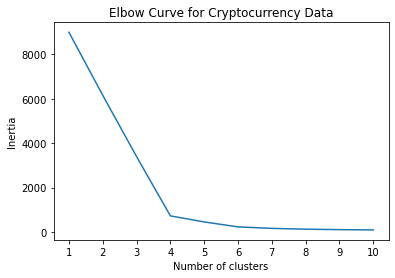

In [216]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Cryptocurrency Data')
plt.show()

In [217]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [218]:
# Add the predicted class column to the dataframe
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.767187,-0.260625,-0.100192,0
1,-0.594349,-0.070199,0.049731,0
2,-0.743210,-0.261508,-0.117204,0
3,-0.381024,-0.163528,0.322671,0
4,-0.191566,-0.156183,0.017059,0


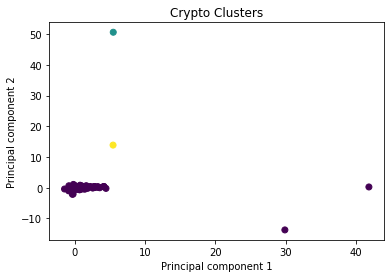

In [219]:
# Visualize the clusters
plt.scatter(x=df_crypto_pca['principal component 1'], y=df_crypto_pca['principal component 2'], c=df_crypto_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto Clusters')
plt.show()

### Further reduce the dataset dimensions with t-SNE and visually inspect the results:

Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [220]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

In [221]:
# Check that dimensions have been reduced to two
tsne_features.shape

(992, 2)

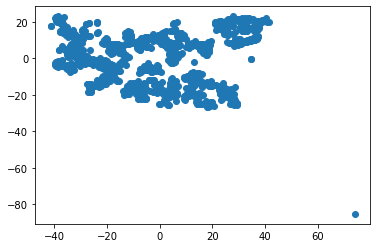

In [222]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Recommendation:

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

Data does not seems to divided into more than one cluster of any importance. I cryptocurrencies data does not shows any significant clustering possible.